# Optimize the vertical KB mirror at the TES beamline in Shadow3

In [1]:
%run -i ../../../examples/prepare_bluesky.py
%run -i ../../../examples/prepare_tes_shadow.py

kbs = [kbv.x_rot, kbv.offz]
kb_bounds = np.array([[-0.10, +0.10], [-0.50, +0.50]]) 

for dof in kbs:
    dof.kind = "hinted"

In [2]:
from bloptools.experiments.shadow import tes

boa = bloptools.bo.BayesianOptimizationAgent(
                                             dofs=kbs, 
                                             dets=[w9],
                                             bounds=kb_bounds, 
                                             db=db, 
                                             experiment=tes
                                            )

RE(boa.initialize(init_scheme='quasi-random', n_init=8))

learning with strategy "quasi-random" ...


getshonecol: no GOOD rays, returning empty array
getshonecol: no GOOD rays, returning empty array
getshonecol: no GOOD rays, returning empty array
getshonecol: no GOOD rays, returning empty array
getshonecol: no GOOD rays, returning empty array
getshonecol: no GOOD rays, returning empty array


getshonecol: no GOOD rays, returning empty array
getshonecol: no GOOD rays, returning empty array
getshonecol: no GOOD rays, returning empty array
getshonecol: no GOOD rays, returning empty array
getshonecol: no GOOD rays, returning empty array
getshonecol: no GOOD rays, returning empty array


   kbv_x_rot  kbv_offz    fitness
0   -0.00675 -0.284212  22.113778
1    0.01825 -0.173101  21.639597
2    0.04325 -0.061990  18.983001
3    0.06825  0.160232  18.265419
4    0.09325  0.382454        NaN
5   -0.03175  0.493565  17.698829
6   -0.05675  0.271343  20.297046
7   -0.08175  0.049121  19.215482


('09182317-3858-40e3-94eb-00f9cd5e3cf4',)

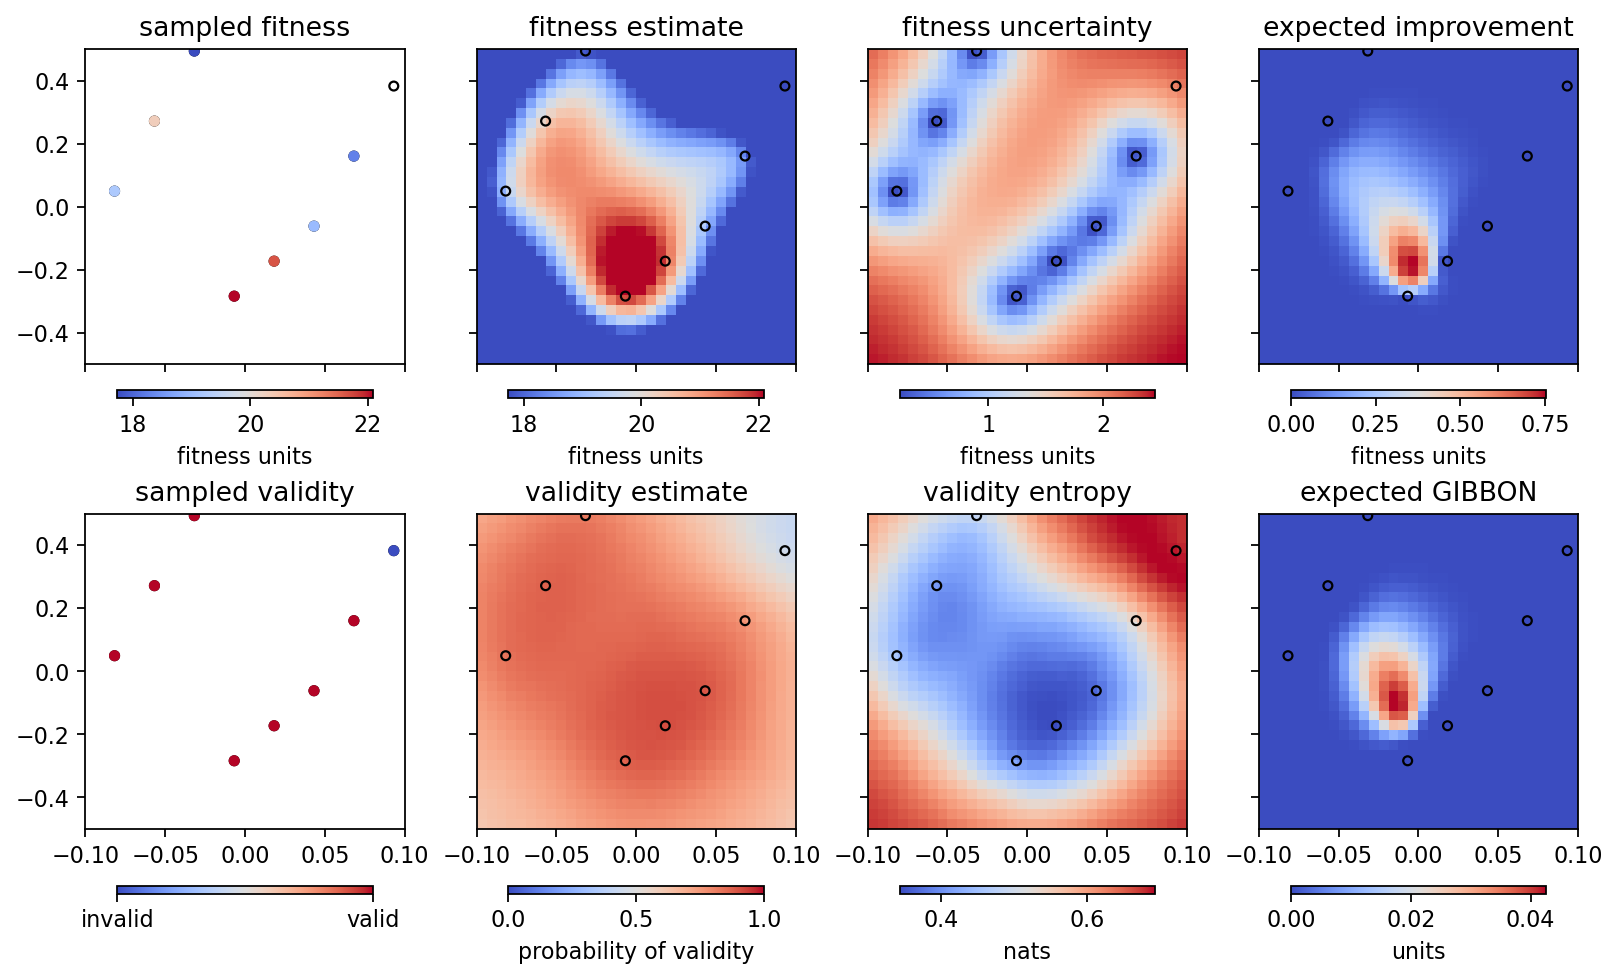

In [3]:
boa.plot_state(gridded=True)

Maximizing the expected improvement:

learning with strategy "eI" ...


    kbv_x_rot  kbv_offz    fitness
8   -0.028911  0.070980  21.104432
9   -0.005611 -0.200213  22.005059
10  -0.004785 -0.230815  21.963279
11   0.001437 -0.223416  23.276278


    kbv_x_rot  kbv_offz    fitness
12   0.004897 -0.235906  23.460340
13   0.006155 -0.192272  23.330673
14   0.002001 -0.112232  23.323495
15  -0.024400  0.209324  21.584679


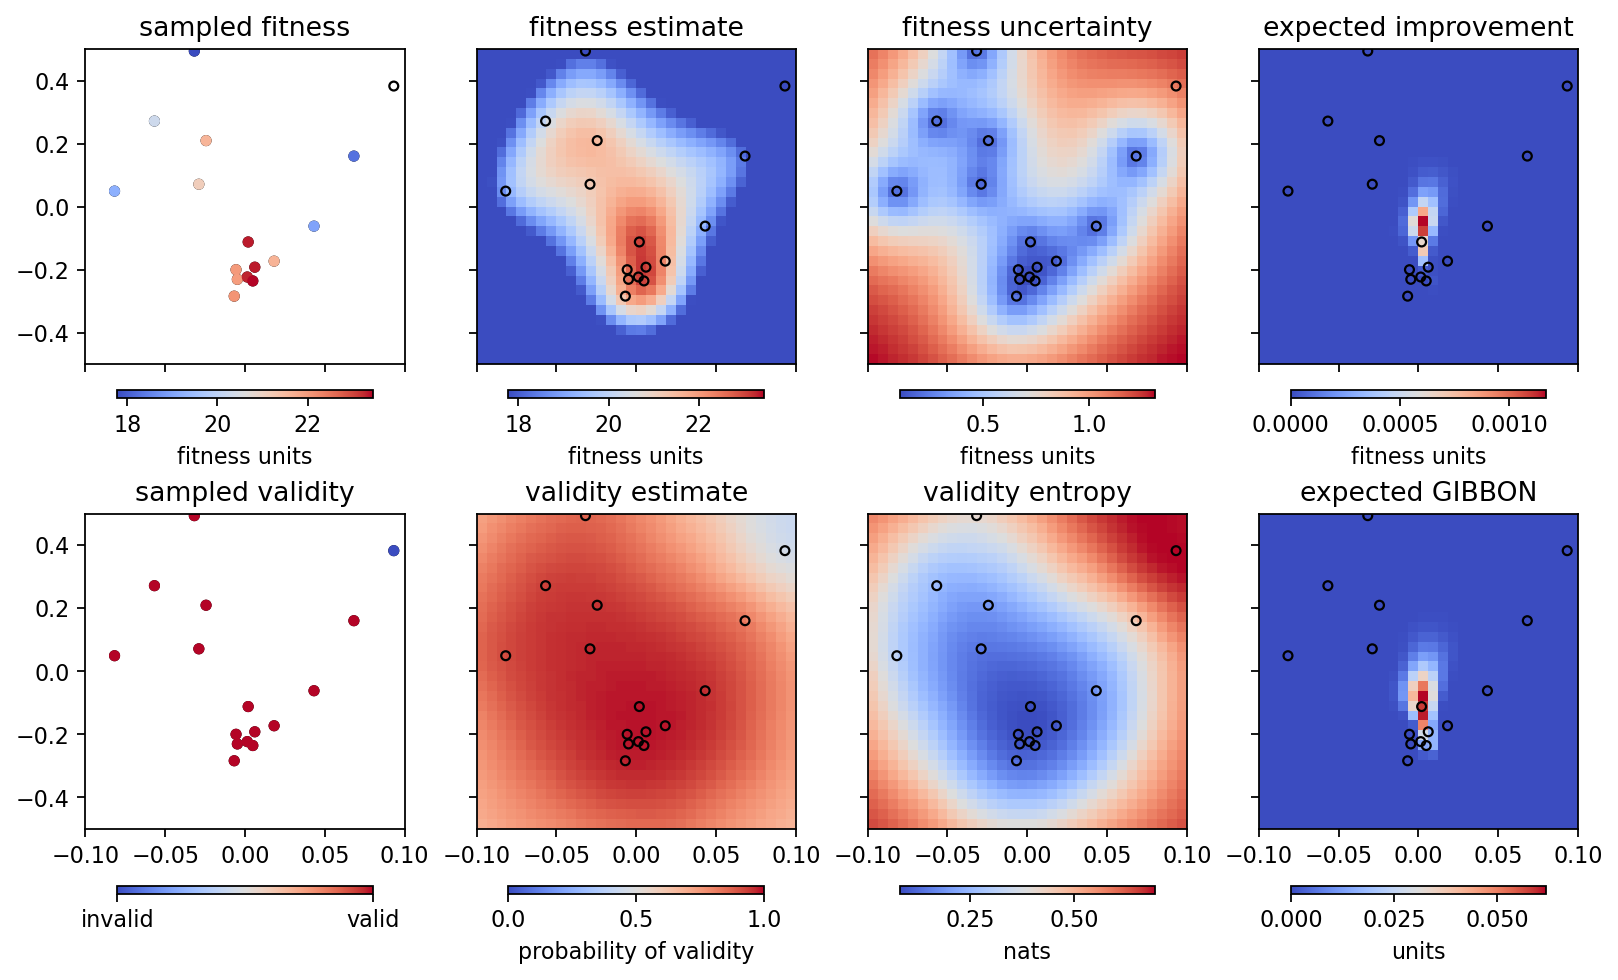

In [4]:
RE(boa.learn(strategy='eI', n_iter=2, n_per_iter=4))
boa.plot_state(gridded=True)